<a href="https://colab.research.google.com/github/Dimonfordont/DS_course/blob/main/Neural_networks/Basic/torch_linear_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [ ]:
train = datasets.MNIST("", train = True, download= True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download= True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [ ]:
'''for data in trainset:
    print (data)
    break
x,y = data[0][0], data[1][0]
print(y)
plt.imshow(x.view(28,28))
print(x.shape)'''

'for data in trainset:\n    print (data)\n    break\nx,y = data[0][0], data[1][0]\nprint(y)\nplt.imshow(x.view(28,28))\nprint(x.shape)'

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 64) #layer 1 input layer
        self.fc2 = nn.Linear(64, 64) #layer 2
        self.fc3 = nn.Linear(64, 64) #layer 3
        self.fc4 = nn.Linear(64, 10) #10 results 0-9

    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function rectifued linear
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #no activation
        # neuron probability distribution, optimizer softmax, in 1 dimention
        return F.log_softmax(x, dim = 1)

In [ ]:
net = Net()
#net

In [ ]:
#prepearing and creating a nn instance
X = torch.rand((28,28))
X = X.view(-1, 28*28)
output = net(X)

In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [ ]:
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() #backpropogation
        optimizer.step() #adjust weights
    print (loss)

tensor(0.2164, grad_fn=<NllLossBackward>)
tensor(0.5959, grad_fn=<NllLossBackward>)
tensor(0.0216, grad_fn=<NllLossBackward>)


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print('Accuracy', round(correct/total, 3))

Accuracy 0.968


tensor(6)


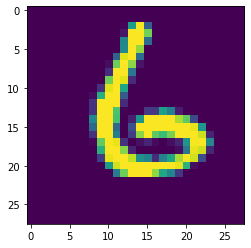

tensor(1)


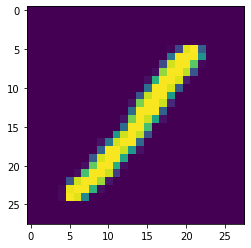

tensor(2)


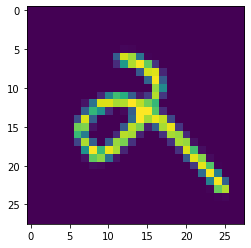

tensor(7)


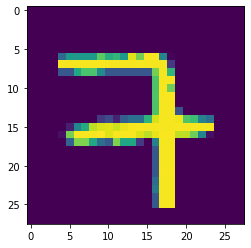

tensor(6)


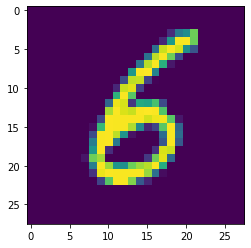

tensor(8)


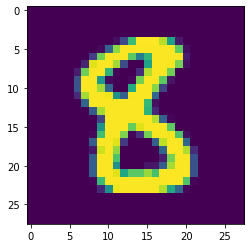

tensor(3)


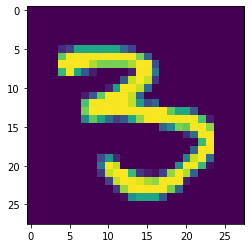

tensor(7)


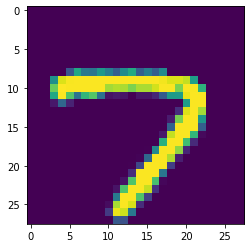

tensor(2)


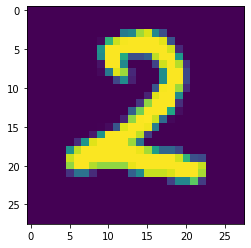

tensor(4)


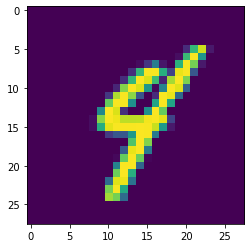

In [ ]:
for num in range(10):
    print(torch.argmax(net(X[num].view(-1, 28*28))))
    plt.imshow(X[num].view(28,28))
    plt.show()